In [39]:
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install pandas
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import sys, os
# assumes this notebook lives in my_project/notebooks/
sys.path.insert(0, os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
##from  src.mlm_functions import  select_R,run_simulation
from  mlm_functions import  select_R,run_simulation


x_test = np.load('C:\\Users\\hadri\\Documents\\Projets\\Projet Finlande - Université Jyväskylä\\Proj_Finland\\ML\\Kalman_Filter_Algorithm\\data\\salinas_x_test.npy')
x_train = np.load('C:\\Users\\hadri\\Documents\\Projets\\Projet Finlande - Université Jyväskylä\\Proj_Finland\\ML\\Kalman_Filter_Algorithm\\data\\salinas_x_train.npy')
y_test = np.load('C:\\Users\\hadri\\Documents\\Projets\\Projet Finlande - Université Jyväskylä\\Proj_Finland\\ML\\Kalman_Filter_Algorithm\\data\\salinas_y_test.npy')
y_train = np.load('C:\\Users\\hadri\\Documents\\Projets\\Projet Finlande - Université Jyväskylä\\Proj_Finland\\ML\\Kalman_Filter_Algorithm\\data\\salinas_y_train.npy')


##from scipy.io import loadmat
##X = loadmat('C:\\Users\\hadri\\Documents\\Projets\\Projet Finlande - Université Jyväskylä\\Proj_Finland\\ML\\Kalman_Filter_Algorithm\\data\\Pavia.mat')
##Y = loadmat('C:\\Users\\hadri\\Documents\\Projets\\Projet Finlande - Université Jyväskylä\\Proj_Finland\\ML\\Kalman_Filter_Algorithm\\data\\Pavia_gt.mat')
##X = np.double(np.array(X['paviaU']))
##Y = np.double(np.array(Y['paviaU_gt']))

##x_test = X[::2,:,:]
##x_train = X[1::2,:,:]
##y_test = Y[::2,:]
##y_train = Y[1::2,:]

labels = np.unique(y_train)


idx=0
for l in labels:
    y_train[y_train==l]=idx
    y_test[y_test==l]=idx
    idx +=1

R, y_R = select_R(x_train, y_train, n_per_class=5, random_seed=10)



uav1_rows = x_train[:,0:int(x_train.shape[1]/2),:]
uav2_rows = x_train[:,int(x_train.shape[1]/2)::,]

# Run simulation
metrics, test_results, train_res, models= run_simulation(x_train, y_train, x_test, y_test, R, y_R, uav1_rows, uav2_rows, 0.94736842, 1.94736842)

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_results['base'][i])
    plt.title('After row '+str(i))
plt.show()

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_results['base'][i]-test_results['base'][i+1])
    plt.title('Difference between '+str(i) + 'and '+str(i+1))
plt.show()

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow((test_results['base'][i]-y_test)*(y_test>0))
    plt.title('After row '+str(i))
plt.show()

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_results['base'][i]*(y_test>0))
    plt.title('After row '+str(i))
plt.show()


plt.imshow(train_res)
plt.show()

plt.imshow((train_res*(y_train>0)-y_train)>0)
plt.show()

mallit = np.zeros((30,30,42))
for i in range(42):
    mallit[:,:,i] = models['base'][i]

for i in range(30):
    for j in range(30):
        plt.plot(mallit[i,j,0::-1]-mallit[i,j,1::],alpha=0.1)
        

plt.show()
        

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2899408690.py, line 12)

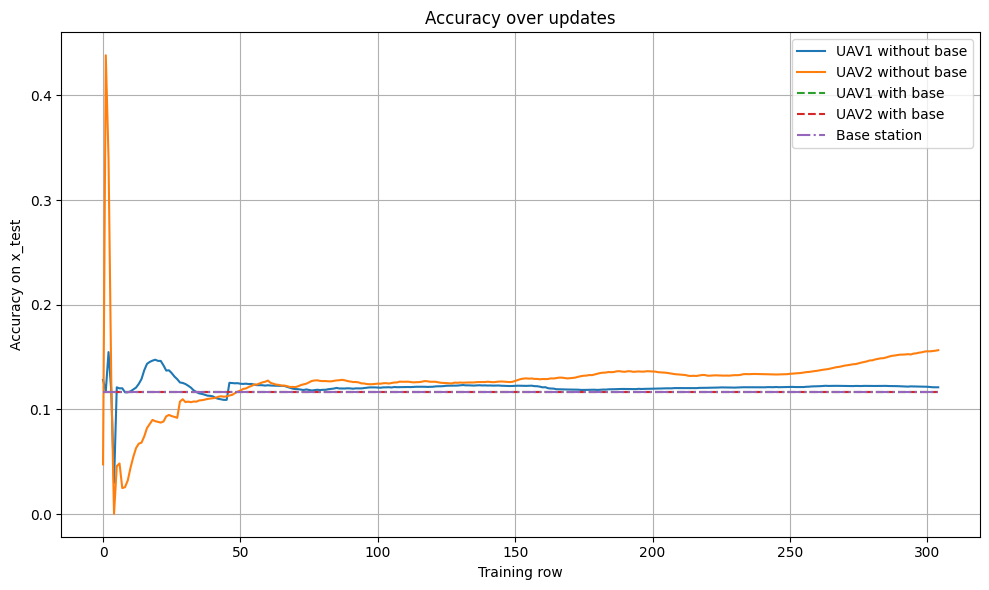

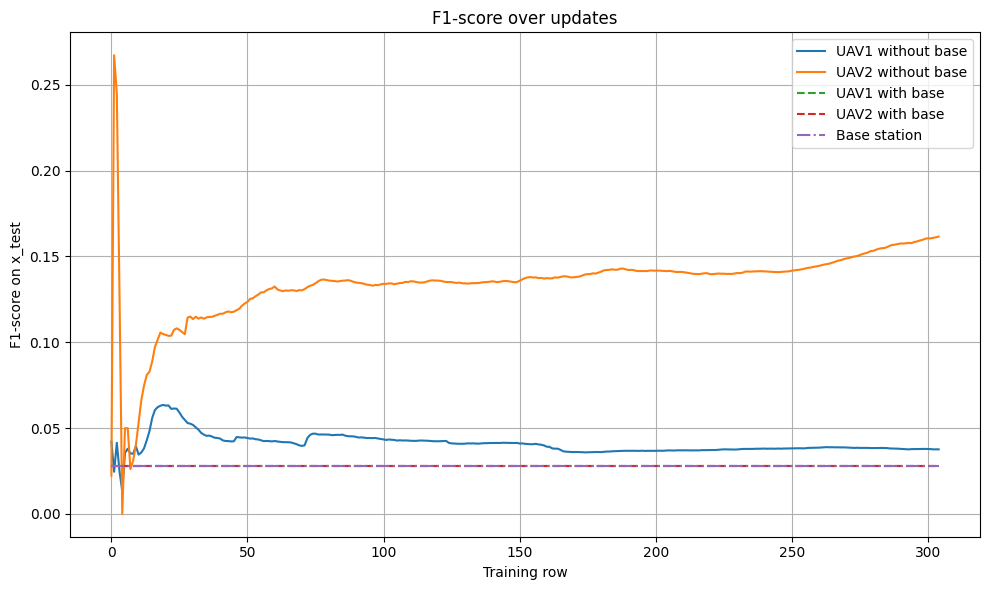

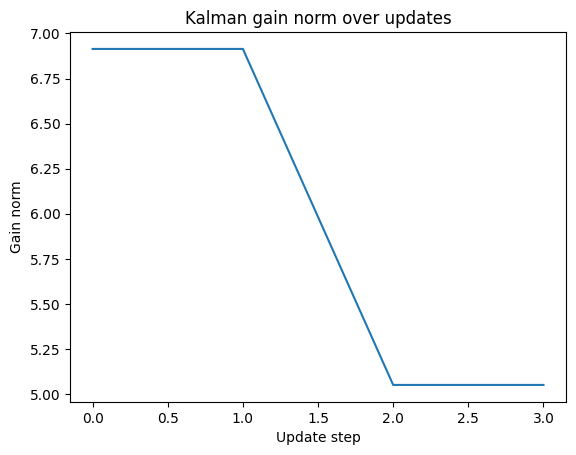

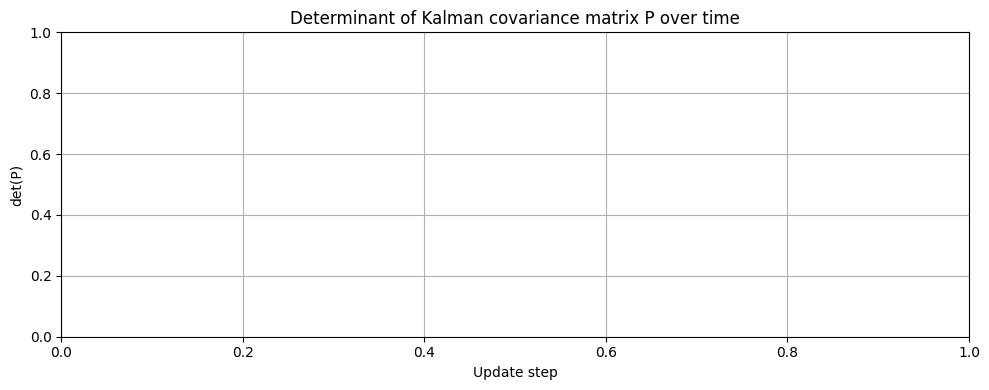

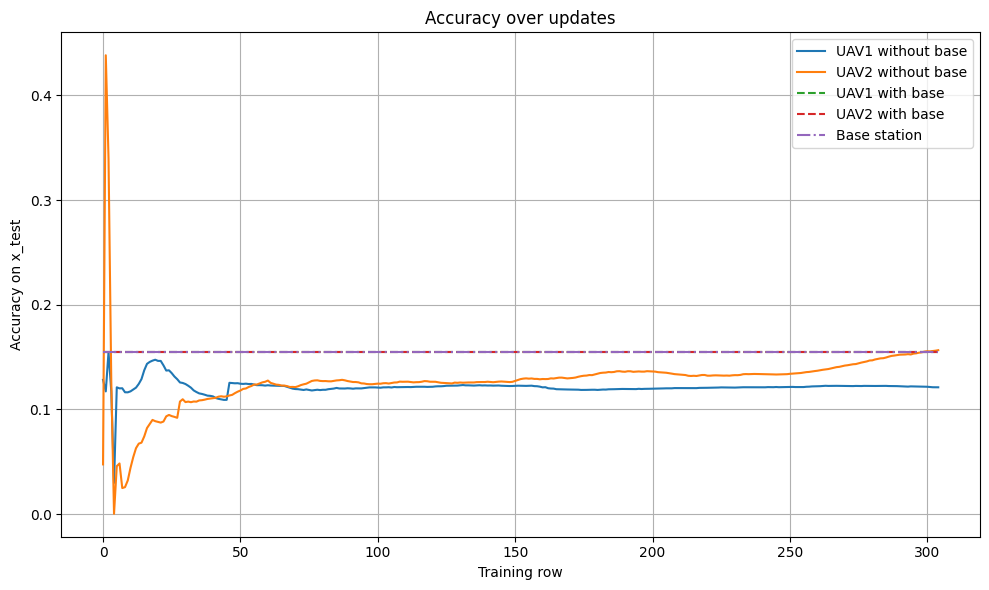

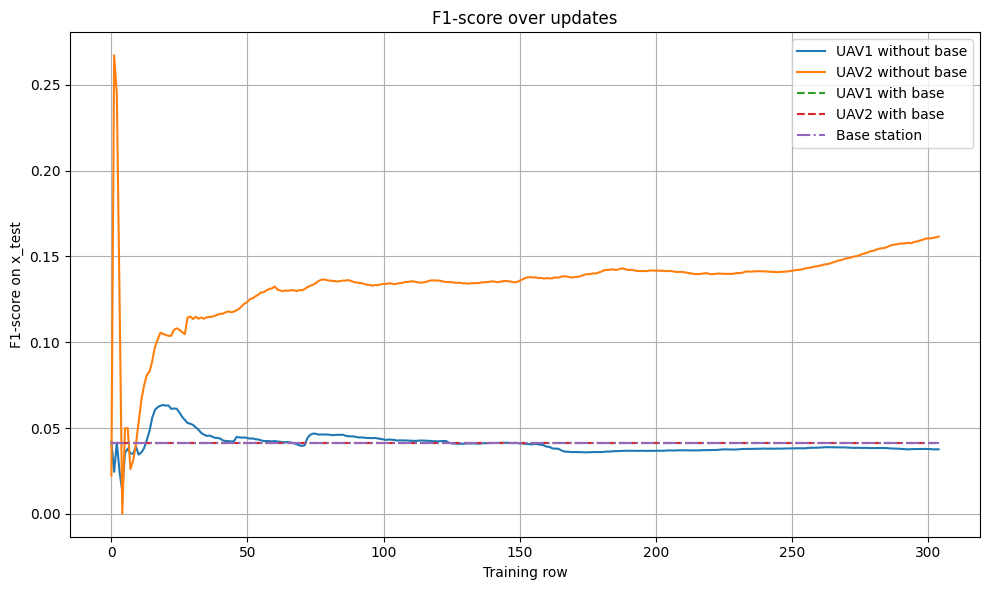

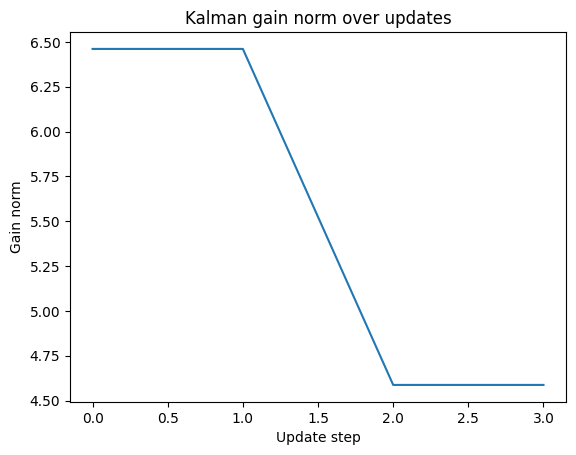

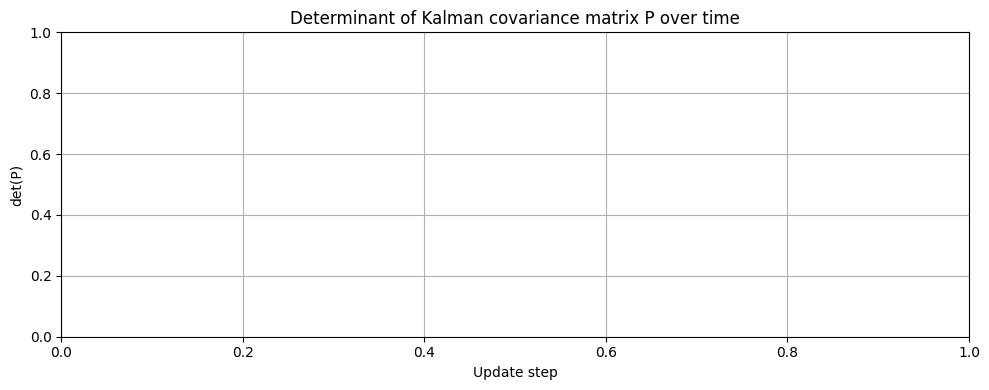

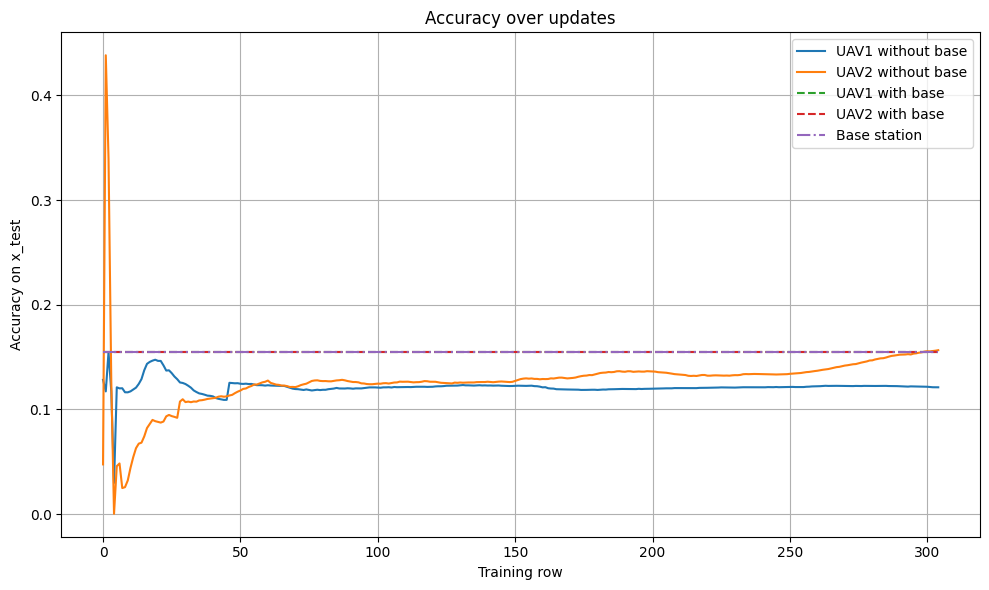

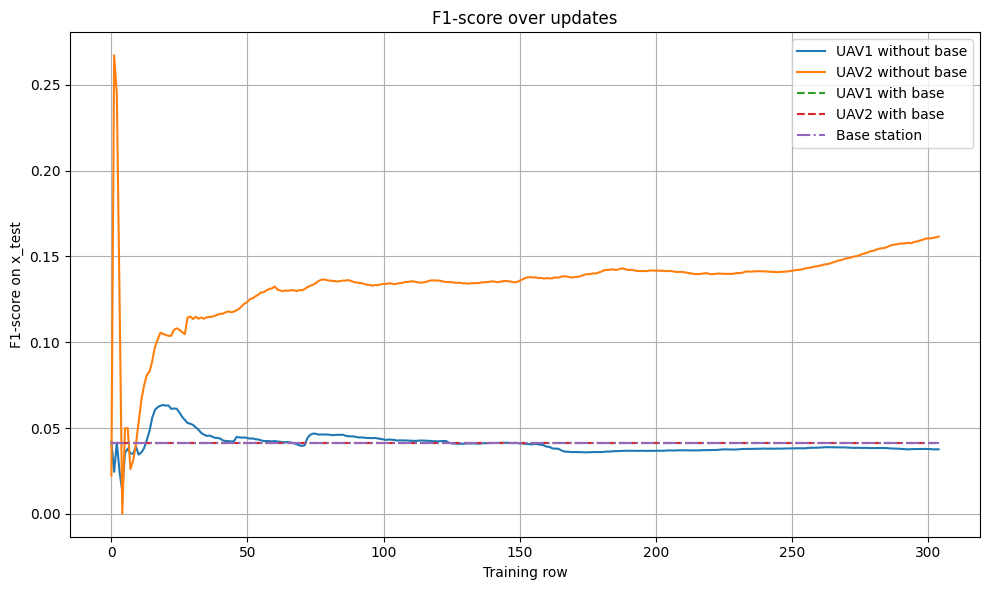

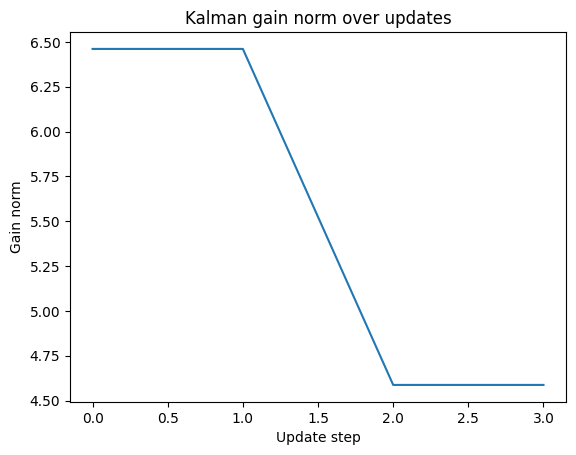

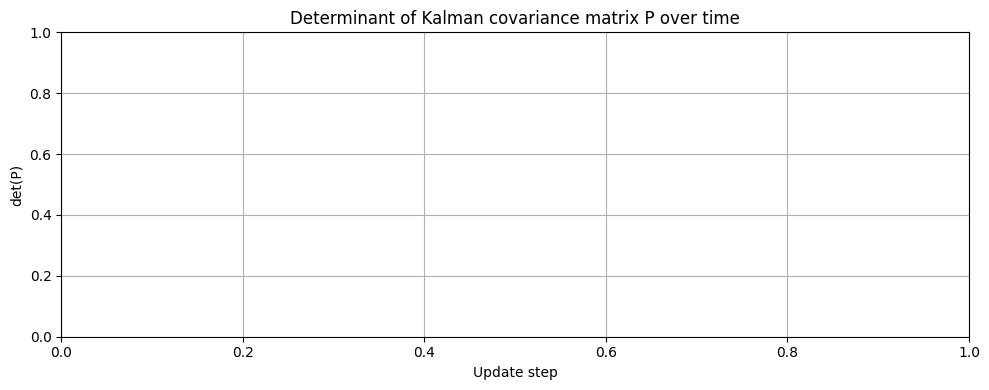

KeyboardInterrupt: 

In [47]:
# Hyperparameter optimization

upper = np.linspace(1,2,20)
lower = np.linspace(0,1,20)

acc_table = np.zeros((20,20))
f1_table =  np.zeros((20,20))

idx = [0,0]

for i in range(0,20):
    for j in range(0,20) :
        metrics, test_results, train_res, models= run_simulation(x_train, y_train, x_train, y_train, R, y_R, uav1_rows, uav2_rows, lower[j], upper[i])
        acc_table[i,j] = metrics['base']['acc'][41]
        f1_table[i,j] = metrics['base']['f1'][41]

plt.imshow(acc_table)
plt.show()
plt.imshow(f1_table)
plt.show()

print(np.max(acc_table))
print(np.argmax(acc_table))

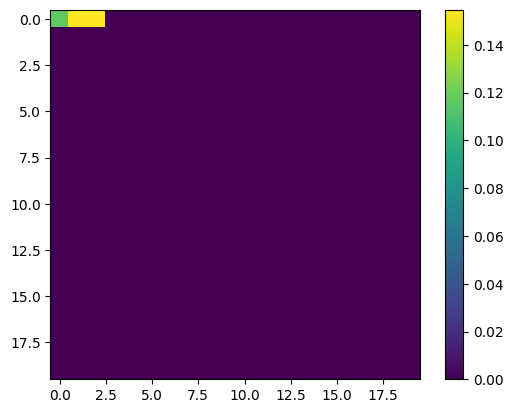

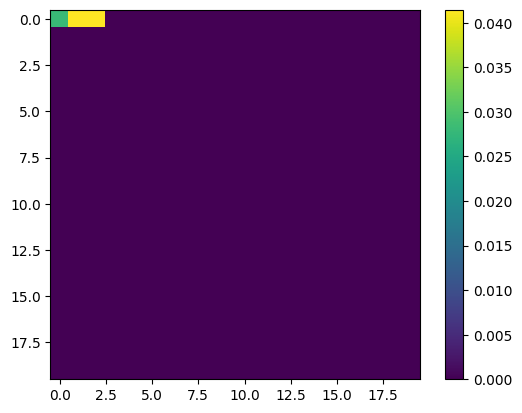

0.1547324718943882
(array([0, 0]), array([1, 2]))
up[1.05263158 1.10526316]
low[0.05263158 0.10526316]


In [48]:
plt.imshow(acc_table)
plt.colorbar()
plt.show()
plt.imshow(f1_table)
plt.colorbar()
plt.show()

print(np.max(acc_table))
print(np.where(acc_table==np.max(acc_table)))
print('up' + str(upper[np.where(acc_table==np.max(acc_table))[1]]))
print('low' + str(lower[np.where(acc_table==np.max(acc_table))[1]]))



In [49]:
lower

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..89.44271909999159].


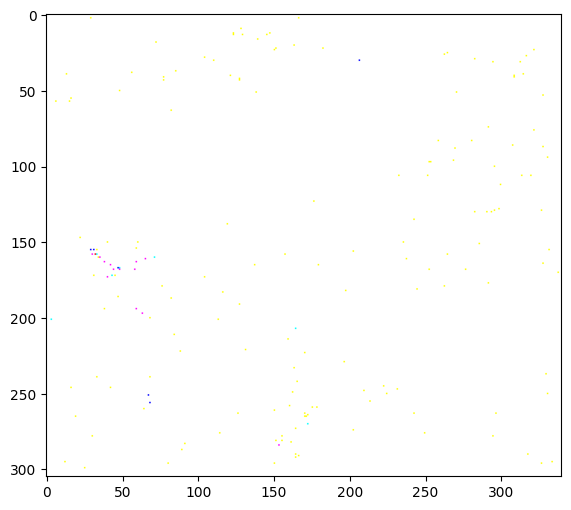

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..8000.0].


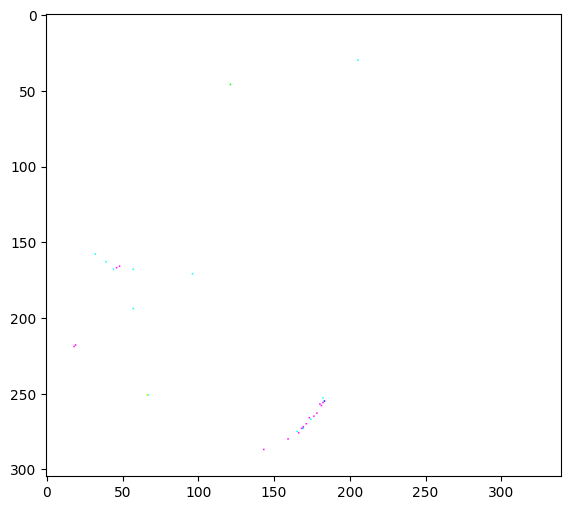

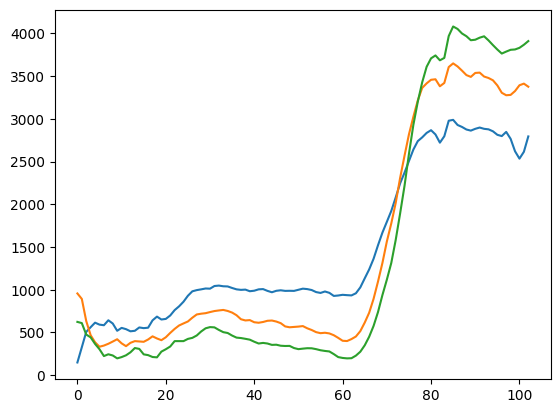

In [50]:
plt.figure(figsize=(10,6))
plt.imshow(x_train[:,:,[35,20,1]]**0.5)
plt.show()
plt.figure(figsize=(10,6))
plt.imshow(x_train[:,:,[50,60,85]])
plt.show()
plt.plot(x_train[30,30,:])
plt.plot(x_train[35,40,:])
plt.plot(x_train[40,50,:])

plt.show()


In [51]:

mallit = np.zeros((30,30,42))
for i in range(42):
    mallit[:,:,i] = models['base'][i]

for i in range(30):
    for j in range(30):
        plt.plot(mallit[i,j,0::-1]-mallit[i,j,1::],alpha=0.1)
        plt.xlabel('Training row')
        plt.ylabel('Model $B$ weights')
        

plt.show()


ValueError: could not broadcast input array from shape (45,45) into shape (30,30)

In [ ]:
len(test_results['base'])

305

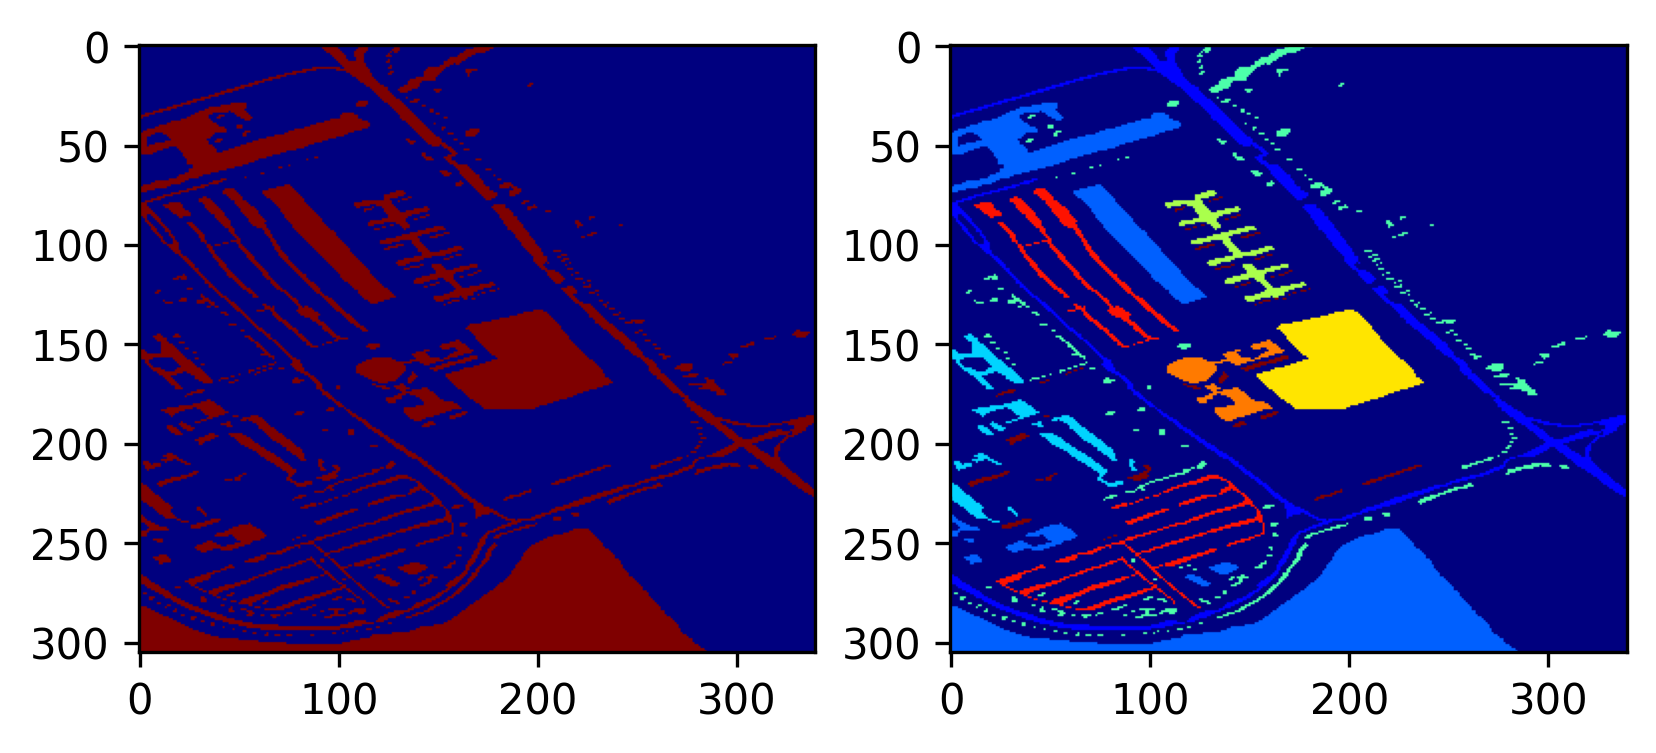

In [52]:
# plt.figure(figsize=(20,20),dpi=300)
# for i in range(20):
#     plt.subplot(4,5,i+1)
#     plt.imshow(test_results['base'][i]*(y_test>0),cmap='jet')
#     plt.colorbar()
#     plt.title('After row '+str(i))
# plt.show()
plt.figure(dpi=300)
plt.subplot(1,2,1)
plt.imshow(test_results['base'][int(len(test_results['base']))-1]*(y_test>0),cmap='jet')
plt.subplot(1,2,2)
plt.imshow(y_test,cmap='jet')
plt.show()

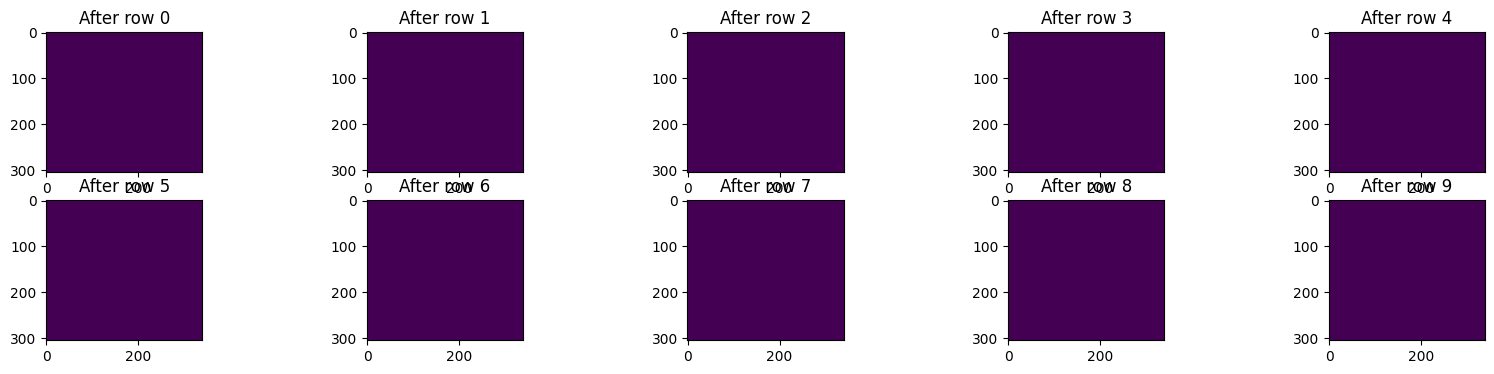

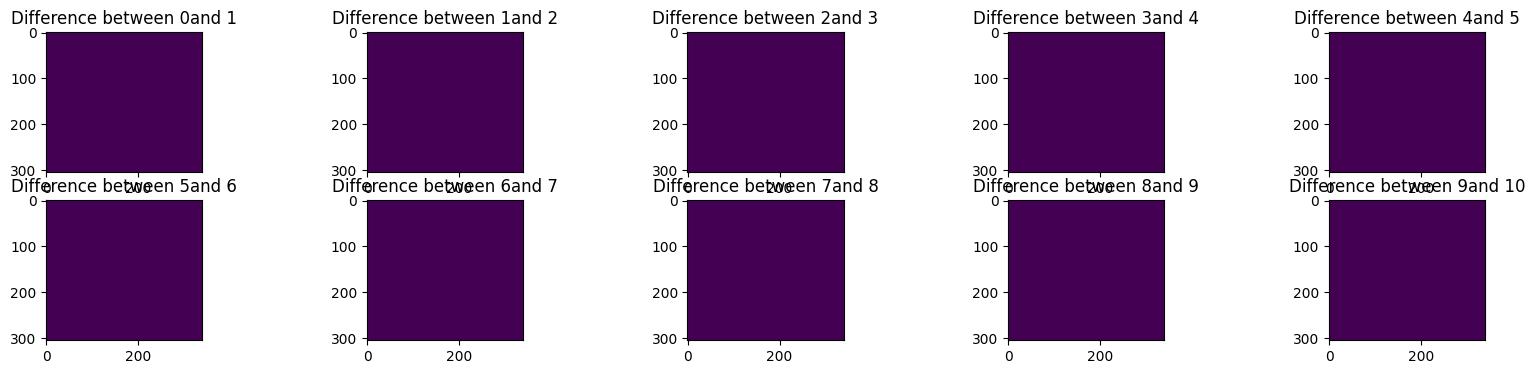

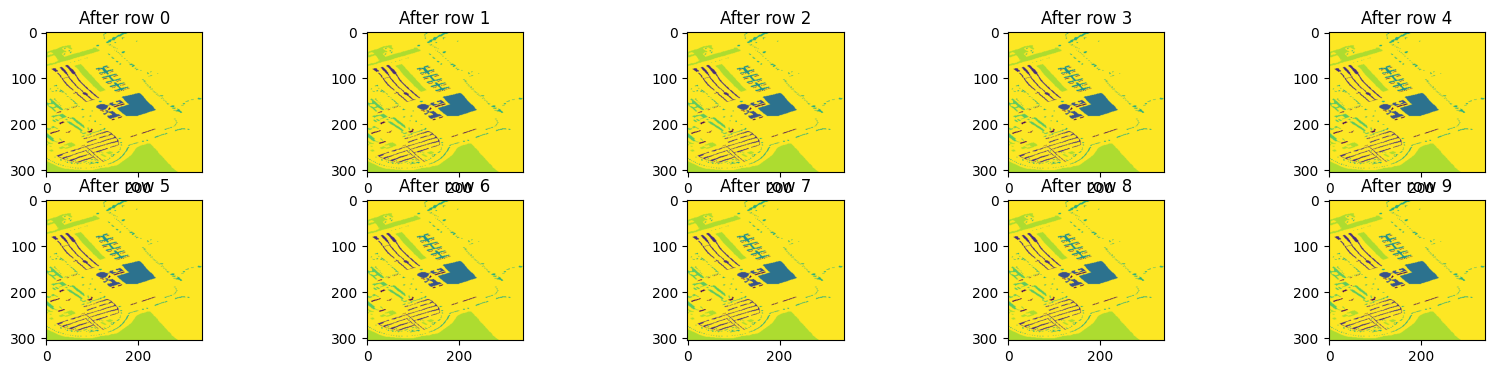

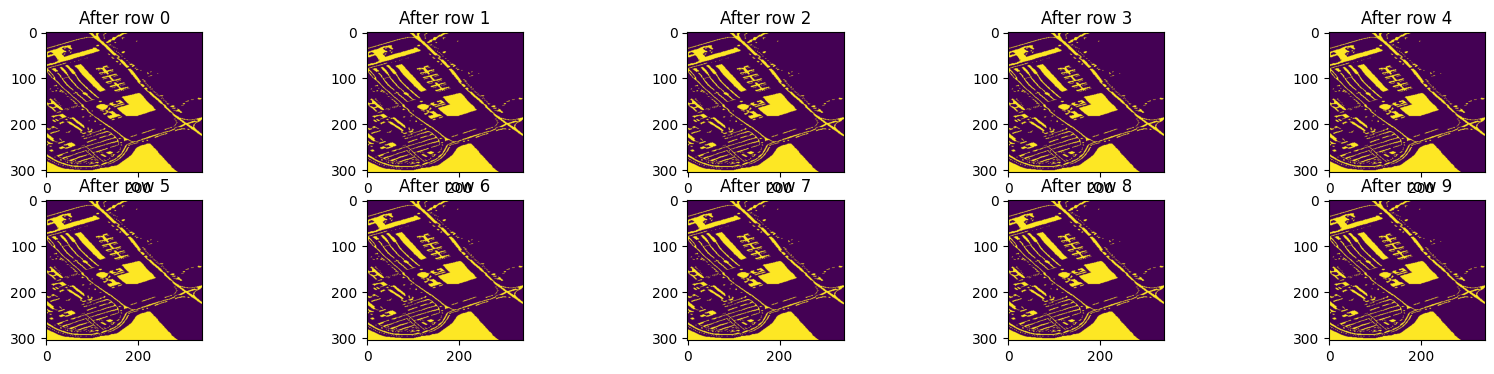

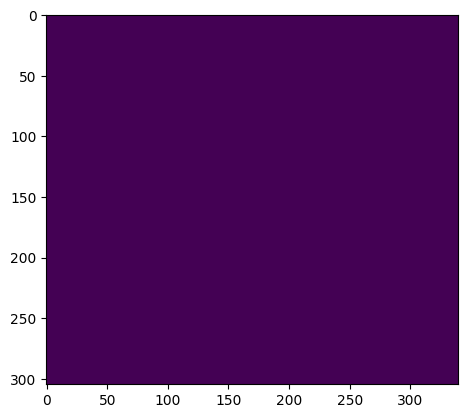

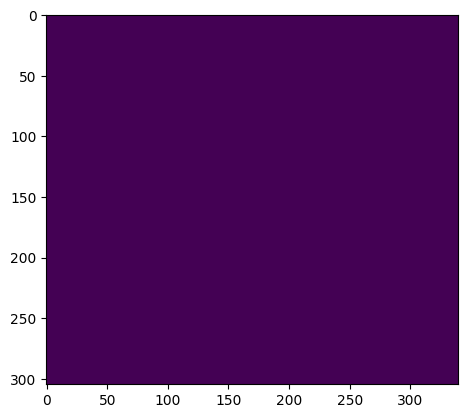

In [53]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_results['base'][i])
    plt.title('After row '+str(i))
plt.show()

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_results['base'][i]-test_results['base'][i+1])
    plt.title('Difference between '+str(i) + 'and '+str(i+1))
plt.show()

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow((test_results['base'][i]-y_test)*(y_test>0))
    plt.title('After row '+str(i))
plt.show()

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_results['base'][i]*(y_test>0))
    plt.title('After row '+str(i))
plt.show()


plt.imshow(train_res)
plt.show()

plt.imshow((train_res*(y_train>0)-y_train)>0)
plt.show()



In [ ]:
from scipy.io import loadmat
X = loadmat('Pavia.mat')
Y = loadmat('Pavia_gt.mat')
X =np.array(X['paviaU'])
Y = np.array(Y['paviaU_gt'])

x_test = X[::2,:,:]
x_train = X[1::2,:,:]
y_test = Y[::2,:]
y_train = Y[1::2,:]

In [ ]:
X.shape

(610, 340, 103)

array([[[ 647,  499,  464, ..., 3221, 3238, 3250],
        [ 604,  546,  527, ..., 2442, 2464, 2528],
        [ 621,  746,  556, ..., 2308, 2345, 2361],
        ...,
        [ 524,  525,  598, ..., 2936, 2940, 2950],
        [ 528,  330,   70, ..., 2737, 2774, 2829],
        [ 711,  483,  423, ..., 2562, 2539, 2488]],

       [[ 705,  681,  668, ..., 2607, 2607, 2609],
        [ 891,  692,  453, ..., 1581, 1561, 1522],
        [ 547,  511,  604, ..., 1535, 1531, 1538],
        ...,
        [1149,  658,  434, ..., 3247, 3251, 3277],
        [ 917, 1004,  743, ..., 2828, 2806, 2808],
        [1037,  849,  547, ..., 2491, 2527, 2522]],

       [[1084,  875,  706, ..., 2108, 2167, 2183],
        [ 335,  517,  611, ..., 1105, 1109, 1095],
        [1042,  683,  318, ...,  806,  791,  814],
        ...,
        [ 799,  693,  481, ..., 2761, 2791, 2842],
        [ 226,  350,  613, ..., 2885, 2879, 2859],
        [ 828,  571,  479, ..., 2799, 2809, 2806]],

       ...,

       [[ 733,  617,  70